
Basic Liabaries


In [ ]:
import numpy as np  #used for arrays and matrices
import pandas as pd #used for data cleaning and processing
import matplotlib.pyplot as plt #data visualization

Reading Data

In [ ]:
file1 = "/content/drive/MyDrive/dsa DA1/script_export.csv" #used to import files to colab
df = pd.read_csv(file1) #once file is converted it is converted into a dataframe

In [ ]:
df.head() #displays the first 5 comments

,Comments
0,i hope no one gives jack shit for choosing wro...
1,this reminded me a lot of firewatch! one of my...
2,Why wasn&#39;t there a red X over Jason&#39;s ...
3,Laugh
4,&quot;night air = death&quot; agreed my asthma...


In [ ]:
df.tail() #display last 5 comments

,Comments
2319,❤
2320,I love you
2321,Hype
2322,Congrats on first. Take this pat on the back!
2323,Your first 🥇🎉🎉🎉


In [ ]:
df.columns #finding the right coloumn name

Index(['Comments '], dtype='object')

In [ ]:
uncleanComments=df.iloc[2]['Comments '] #chechking one comment
uncleanComments

'Why wasn&#39;t there a red X over Jason&#39;s photo at the end?  He got his face cut off, didn&#39;t he?'

Cleaning Data

Check lis for cleaning data for sentiment analysis

1. Text Lowercasing (done)
2. Special Character Removal (done)
3. Punctuation Removal (done)
4. Number Removal (done)
5. Stopword Removal (done)
6. Lemmatization or Stemming : Reduce words to their base or root form. Eg = "running" to "run". (Figuring out)
7. Handle Negations : Consider handling negations like "not good" or "isn't bad" to preserve the sentiment polarity. (figuring out)
8. Handling Emojis and Special Characters (done)
9. Whitespace Removal (done)
10.Tokenization : Tokenize the text into individual words or tokens for further analysis (done)
11.Handling Usernames and Mentions(@) (done)
12.Handling URLs (done)
13.Handling Non-English Text (not working atm)
14.Spell Checking and Correction

In [ ]:
import nltk #Natural Language Toolkit
nltk.download('stopwords') #downloading the respective stop words
from nltk.corpus import stopwords #Submodule of nltk
import re #regular instruction module used for cleaning the data
nltk.download('punkt') #punkt is used for tokenization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dsa DA1/script_export.csv') #reading the file

def clean_text(text):   # Data cleaning removal function
    text = text.lower() # Used to convert to lowercase
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remove URLs
    text = re.sub(r"[^a-z\s@]", "", text)  # Remove special characters
    text = re.sub(r"\d+", "", text) # Remove numbers
    text = re.sub(r"@", "", text) # Remove @ symbols
    text = re.sub(r"[^\w\s]", "", text) # Remove punctuation
    text = re.sub(r'[^\x00-\x7F]+', '', text) # Remove emojis
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespaces and trim

    words = nltk.word_tokenize(text)  # Tokenize the text into individual words or tokens for further analysis
    stop_words = set(stopwords.words('english'))  #List of stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]   # Removing stopword
    filtered_text = ' '.join(filtered_words) #the remaing words need to joined back to a sentance

    return filtered_text

df['CleanedComments'] = df['Comments '].apply(clean_text) # Storing the dataframe to a new coloumn called 'CleanedComments' from  the old coloumn 'Comments'

df = df.dropna(subset=['CleanedComments']) # Removing empty rows if any

output_path = '/content/drive/MyDrive/dsa DA1/final_cleaned_data.csv' # Once the data has been cleaned it is saved into a new CSV file in your Google Drive
df.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}") #Location of the new path where the cleaned data is saved

Cleaned data saved to: /content/drive/MyDrive/dsa DA1/final_cleaned_data.csv


In [ ]:
print(df[['Comments ', 'CleanedComments']]) # Comparing the cleaned data with raw one ('Comments' and 'CleanedComments')


                                              Comments   \
0     i hope no one gives jack shit for choosing wro...   
1     this reminded me a lot of firewatch! one of my...   
2     Why wasn&#39;t there a red X over Jason&#39;s ...   
3                                                 Laugh   
4     &quot;night air = death&quot; agreed my asthma...   
...                                                 ...   
2319                                                  ❤   
2320                                         I love you   
2321                                               Hype   
2322      Congrats on first. Take this pat on the back!   
2323                                    Your first 🥇🎉🎉🎉   

                                        CleanedComments  
0     hope one gives jack shit choosing wrong choice...  
1             reminded lot firewatch one favorite games  
2       wasnt red x jasons photo end got face cut didnt  
3                                                 laugh  
4

Sentiment Analysis


In [ ]:
import nltk
nltk.download('vader_lexicon') #sub module used for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer #sub module used for sentiment analysis
import matplotlib.pyplot as plt #visualization module

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dsa DA1/final_cleaned_data.csv') #reading data

df.dropna(subset=['CleanedComments'], inplace=True) # Drop rows with NaN values in the 'CleanedComments' column

sia = SentimentIntensityAnalyzer() # Initialize the VADER sentiment analyzer

# Function to get sentiment scores
def get_sentiment_scores(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Apply sentiment analysis to the 'CleanedComments' column
df['SentimentScores'] = df['CleanedComments'].apply(get_sentiment_scores)

# Extract sentiment scores
df['CompoundSentiment'] = df['SentimentScores'].apply(lambda x: x['compound'])
df['PositiveSentiment'] = df['SentimentScores'].apply(lambda x: x['pos'])
df['NegativeSentiment'] = df['SentimentScores'].apply(lambda x: x['neg'])
df['NeutralSentiment'] = df['SentimentScores'].apply(lambda x: x['neu'])

# Additional sentiment metrics
df['SentimentCategory'] = df['CompoundSentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the DataFrame with sentiment scores and additional metrics
print(df[['CleanedComments', 'CompoundSentiment', 'PositiveSentiment', 'NegativeSentiment', 'NeutralSentiment', 'SentimentCategory']])



                                        CleanedComments  CompoundSentiment  \
0     hope one gives jack shit choosing wrong choice...            -0.0516   
1             reminded lot firewatch one favorite games             0.4588   
2       wasnt red x jasons photo end got face cut didnt            -0.2732   
3                                                 laugh             0.5574   
4      quotnight air deathquot agreed asthmatic brother             0.2732   
...                                                 ...                ...   
2318                                            hhehehe             0.0000   
2320                                               love             0.6369   
2321                                               hype             0.0000   
2322                       congrats first take pat back             0.5267   
2323                                              first             0.0000   

      PositiveSentiment  NegativeSentiment  NeutralSentiment Se

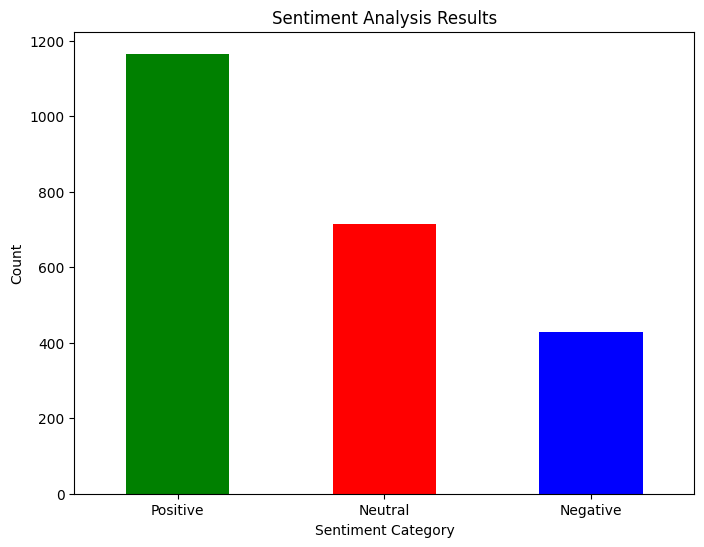

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()